In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Car_data.csv')

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [3]:
df1 = df.copy()

In [4]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [5]:
df1 = pd.get_dummies(df1[['Fuel_Type','Seller_Type','Transmission']],drop_first=True)

In [10]:
df1.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [6]:
df = pd.concat([df,df1],axis = 1,)

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0,1


In [8]:
df = df.drop(['Fuel_Type','Seller_Type','Transmission'],axis = 1)

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [9]:
df['present_year'] = 2020

In [10]:
df['age']  = df['present_year']-df['Year']

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,present_year,age
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1,2020,6
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,2020,7
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1,2020,3
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1,2020,9
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,2020,6


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'present_year', 'age'],
      dtype='object')

In [12]:
X = df.drop(['Selling_Price','present_year','Year'],axis = 1)

In [13]:
y = df.iloc[:,2]

In [14]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [15]:
X.head()

,Car_Name,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,ritz,5.59,27000,0,0,1,0,1,6
1,sx4,9.54,43000,0,1,0,0,1,7
2,ciaz,9.85,6900,0,0,1,0,1,3
3,wagon r,4.15,5200,0,0,1,0,1,9
4,swift,6.87,42450,0,1,0,0,1,6


In [16]:
X.drop('Car_Name',axis = 1,inplace = True)

In [17]:
X.corr()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
Present_Price,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715,0.047584
Kms_Driven,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,0.524342
Owner,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,0.182104
Fuel_Type_Diesel,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,-0.064315
Fuel_Type_Petrol,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,0.059959
Seller_Type_Individual,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,0.039896
Transmission_Manual,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,-0.000394
age,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,1.000000


In [14]:
from scipy import stats

In [19]:
import seaborn as sns

In [35]:
#conda install seaborn if pip install does not work then use conda install 

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\users\deepankar\anaconda3\envs\carprediction

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build

Note: you may need to restart the kernel to use updated packages.
    ---------------------------|-----------------
    mkl-2020.1                 |              216        99.3 MB
    scipy-1.5.0                |   py37h9439919_0        11.8 MB
    ------------------------------------------------------------
                                           Total:       111.1 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/win-64::blas-1.0-mkl
  cycler             pkgs/main/win-64::cycler-0.10.0-py37_0
  freetype           pkgs/main/win-64::freetype-2.10.2-hd328e21_0
  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  icu                pkgs/main/win-64::icu-58.2-ha925a31_3
  i

mkl-2020.1           | 99.3 MB   | ###6       |  36% 
mkl-2020.1           | 99.3 MB   | ###6       |  36% 
mkl-2020.1           | 99.3 MB   | ###6       |  37% 
mkl-2020.1           | 99.3 MB   | ###6       |  37% 
mkl-2020.1           | 99.3 MB   | ###7       |  37% 
mkl-2020.1           | 99.3 MB   | ###7       |  37% 
mkl-2020.1           | 99.3 MB   | ###7       |  37% 
mkl-2020.1           | 99.3 MB   | ###7       |  38% 
mkl-2020.1           | 99.3 MB   | ###7       |  38% 
mkl-2020.1           | 99.3 MB   | ###7       |  38% 
mkl-2020.1           | 99.3 MB   | ###8       |  38% 
mkl-2020.1           | 99.3 MB   | ###8       |  38% 
mkl-2020.1           | 99.3 MB   | ###8       |  39% 
mkl-2020.1           | 99.3 MB   | ###8       |  39% 
mkl-2020.1           | 99.3 MB   | ###9       |  39% 
mkl-2020.1           | 99.3 MB   | ###9       |  39% 
mkl-2020.1           | 99.3 MB   | ###9       |  39% 
mkl-2020.1           | 99.3 MB   | ###9       |  40% 
mkl-2020.1           | 99.3 

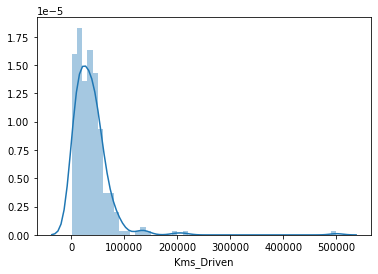

In [20]:
sns.distplot(df['Kms_Driven'])

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

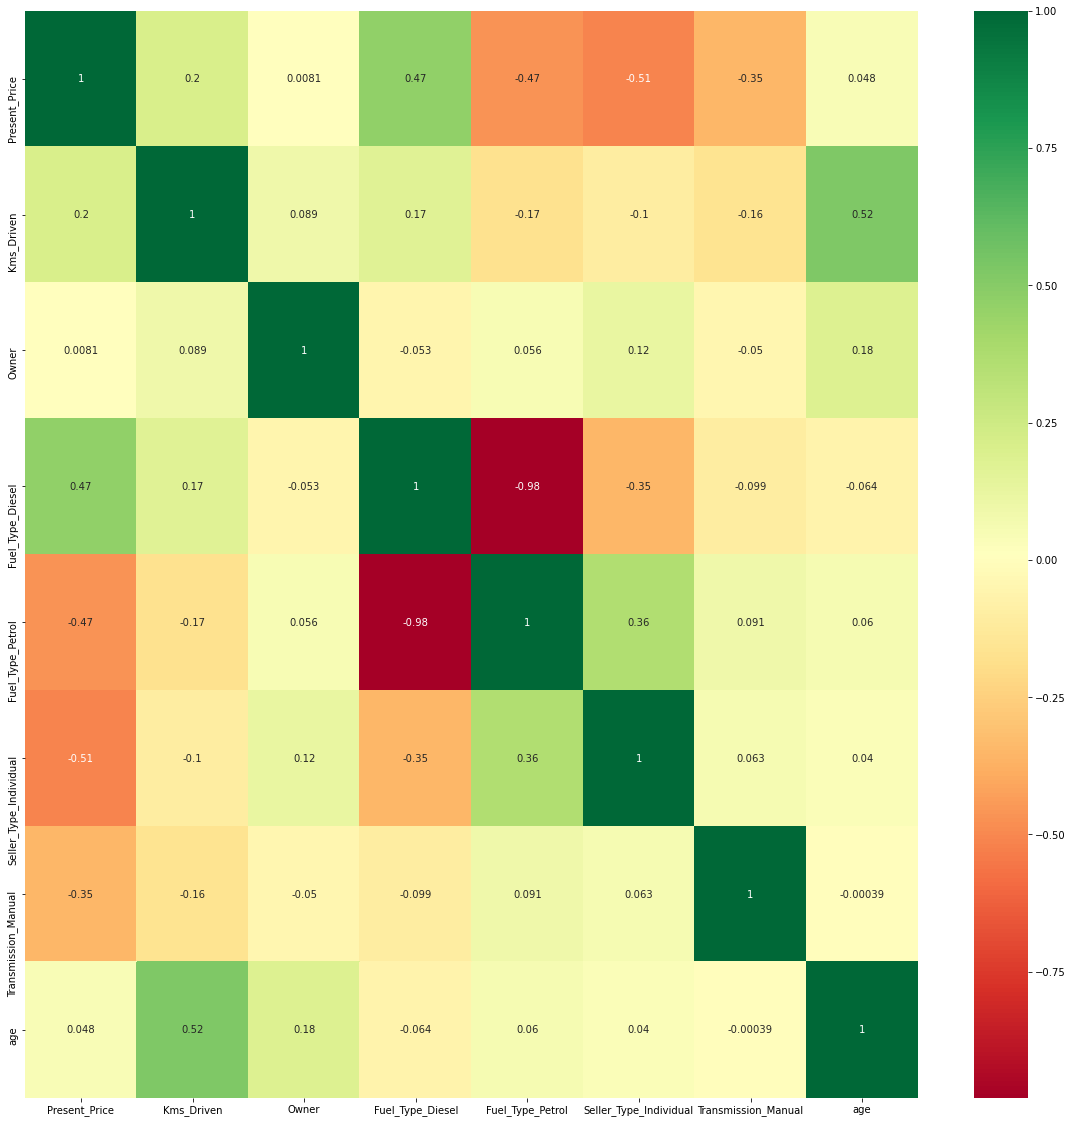

In [22]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap 
g = sns.heatmap(X[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [46]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:

print(model.feature_importances_)

[0.34287816 0.03925112 0.00056625 0.26341668 0.00634155 0.12131556
 0.151107   0.07512369]


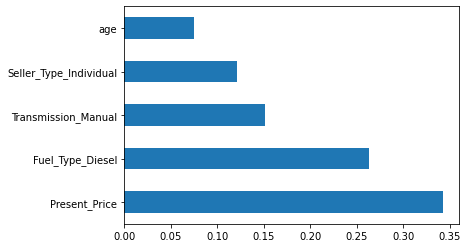

In [26]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [28]:
X_train.shape

(210, 8)

In [29]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [43]:
#Hyperparameters tuning using Randomized searchcv
n_estimators = [int(x) for x in np.linspace(start = 200,stop = 1200,num = 10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,15,10]
min_samples_leaf = [1,2,5,10]


In [44]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf
               
}

In [46]:
random_grid

{'n_estimators': [200, 311, 422, 533, 644, 755, 866, 977, 1088, 1200],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 15, 10],
 'min_samples_leaf': [1, 2, 5, 10]}

In [47]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring = 'neg_mean_squared_error' ,n_iter = 100,cv = 3,verbose = 2,random_state = 100,n_jobs = 1)


In [57]:
rf_random.best_params_

{'n_estimators': 422,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 670}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid=  {'n_estimators':[rf_random.best_params_['n_estimators']-200,rf_random.best_params_['n_estimators']-100,
                             rf_random.best_params_['n_estimators'],rf_random.best_params_['n_estimators']+100,
                             rf_random.best_params_['n_estimators']+200] ,
               'max_features':[rf_random.best_params_['max_features']] ,
               'max_depth':[rf_random.best_params_['max_depth']] ,
               'min_samples_leaf':[rf_random.best_params_['min_samples_leaf'],rf_random.best_params_['min_samples_leaf']+2,
                                   rf_random.best_params_['min_samples_leaf']+4] ,
               'min_samples_split': [rf_random.best_params_['min_samples_split']-1,rf_random.best_params_['min_samples_split'],
                                    rf_random.best_params_['min_samples_split']+1]
               
}
    

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor()
GridSearch = GridSearchCV(estimator = rf,param_grid=param_grid,scoring = 'neg_mean_squared_error' ,cv = 3,verbose = 2,n_jobs = 1)


In [49]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=230 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=230, total=   2.3s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=230 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=230, total=   1.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=230 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=230, total=   1.9s
[CV] n_estimators=866, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=560 
[CV]  n_estimators=866, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=560, total=   1.9s
[CV] n_estimators=866, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=560 
[CV]  n_estimators=866, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=560, total=   2.0s
[CV] n_estimators=866, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=560 
[CV]  n_estimators=866, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=560, total=   1.7s
[CV] n_estimators=311, min_samples

[CV]  n_estimators=755, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   1.2s
[CV] n_estimators=755, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=755, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   1.3s
[CV] n_estimators=977, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=450 
[CV]  n_estimators=977, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=450, total=   1.5s
[CV] n_estimators=977, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=450 
[CV]  n_estimators=977, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=450, total=   1.5s
[CV] n_estimators=977, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=450 
[CV]  n_estimators=977, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=450, total=   1.5s
[CV] n_estimators=1200, min_sam

[CV]  n_estimators=422, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=890, total=   0.7s
[CV] n_estimators=422, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=890 
[CV]  n_estimators=422, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=890, total=   0.7s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=890 
[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=890, total=   0.5s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=890 
[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=890, total=   0.5s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=890 
[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=890, total=   0.5s
[CV] n_estimators=1088, min_samples_spli

[CV]  n_estimators=755, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=230, total=   1.2s
[CV] n_estimators=755, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=230 
[CV]  n_estimators=755, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=230, total=   1.1s
[CV] n_estimators=311, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=230 
[CV]  n_estimators=311, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=230, total=   0.5s
[CV] n_estimators=311, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=230 
[CV]  n_estimators=311, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=230, total=   0.5s
[CV] n_estimators=311, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=230 
[CV]  n_estimators=311, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=230, total=   0.5s
[CV] n_estimators=422, min_samples_sp

[CV]  n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=450, total=   1.7s
[CV] n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=450 
[CV]  n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=450, total=   1.7s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=450 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=450, total=   1.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=450 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=450, total=   1.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=450 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=450, total=   1.8s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=422, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1000, total=   0.7s
[CV] n_estimators=422, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1000 
[CV]  n_estimators=422, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1000, total=   0.7s
[CV] n_estimators=422, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=340 
[CV]  n_estimators=422, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=340, total=   0.7s
[CV] n_estimators=422, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=340 
[CV]  n_estimators=422, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=340, total=   0.7s
[CV] n_estimators=422, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=340 
[CV]  n_estimators=422, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=340, total=   0.6s
[CV] n_estimators=755, min_samples

[CV]  n_estimators=422, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=230, total=   0.7s
[CV] n_estimators=422, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=230 
[CV]  n_estimators=422, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=230, total=   0.7s
[CV] n_estimators=311, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=890 
[CV]  n_estimators=311, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=890, total=   0.5s
[CV] n_estimators=311, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=890 
[CV]  n_estimators=311, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=890, total=   0.5s
[CV] n_estimators=311, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=890 
[CV]  n_estimators=311, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=890, total=   0.5s
[CV] n_estimators=866, min_samples

[CV]  n_estimators=866, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=450, total=   1.4s
[CV] n_estimators=866, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=450 
[CV]  n_estimators=866, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=450, total=   1.4s
[CV] n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=1000 
[CV]  n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=1000, total=   1.7s
[CV] n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=1000 
[CV]  n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=1000, total=   1.7s
[CV] n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=1000 
[CV]  n_estimators=1088, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=1000, total=   2.0s
[CV] n_estimators=866, min_samp

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 10],
                                        'n_estimators': [200, 311, 422, 533,
                                                         644, 755, 866, 977,
                                                         1088, 1200]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [91]:
GridSearch.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=222 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self.

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=222, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=222, total=   0.1s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=222 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=222, total=   0.1s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=322 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=422, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=522, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=522, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=622, total=   0.5s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=222, total=   0.6s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=222, total=   0.5s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=222, total=   0.5s
[CV] max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=322, total=   0.7s
[CV] max_depth=670, max_features=auto, min_

c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=222, total=   0.1s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=222, total=   0.1s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=322 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=322, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=322 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=622, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=222, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=222, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=222, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=322, total=   0.6s
[CV] max_depth=670, max_features=auto, min_

c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=222, total=   0.1s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=222, total=   0.1s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=322 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=322 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=322, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=422, total=   0.2s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=422 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=422, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=522 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=522, total=   0.3s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=622 


c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\deepankar\anaconda3\envs\carprediction\lib\site

[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=622, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222, total=   0.4s
[CV] max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=322 
[CV]  max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=322, total=   0.5s
[CV] max_depth=670, max_features=auto, min_

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [670], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [222, 322, 422, 522, 622]},
             scoring='neg_mean_squared_error', verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 422,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 670}

In [92]:
GridSearch.best_params_

{'max_depth': 670,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 222}

In [51]:
rf_random.best_score_

-3.444068593946034

In [93]:
GridSearch.best_score_

-3.4055873432894344

In [52]:
y_pred = rf_random.predict(X_test)

In [94]:
y_pred = GridSearch.predict(X_test)

In [166]:
y_pred

array([20.94391, 13.17796,  0.57414,  5.16169,  2.93734,  6.1541 ,
        1.08285,  0.71686,  3.32988,  4.64545,  9.98704,  1.3111 ,
        5.78451,  4.82828,  4.4229 , 10.69002,  6.29721,  0.53144,
        0.25967,  4.15585,  0.69821,  4.85345,  1.07949,  2.90588,
        0.56478,  2.74943,  0.42353,  5.97814,  5.513  , 11.76721,
        8.75355,  6.55875, 10.76123,  4.85622,  5.29086,  0.90585,
        3.94827,  0.81352,  0.44285,  0.46826,  4.87711, 16.98284,
        0.64785,  0.5073 , 20.99461,  9.54667,  8.84183,  2.96271,
       11.63038,  0.5918 ,  0.42556,  3.17955,  6.52724,  6.06296,
        7.56101,  5.26074,  0.4255 ,  5.45966,  0.5622 ,  1.39693,
        7.93934])

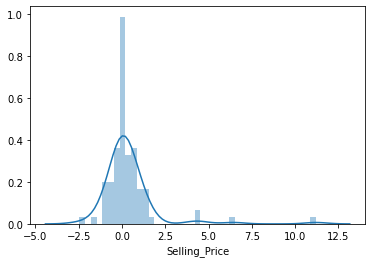

In [95]:
sns.distplot(y_test-y_pred)

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('rmse' , rmse)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))


rmse 1.6460368039539353
MAE: 0.7650977979549413
MSE: 2.709437159970886


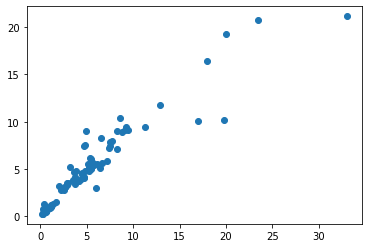

In [40]:
plt.scatter(y_test,y_pred)

In [101]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(GridSearch, file)